In [1]:
import pandas  as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
df=pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [32]:
df.iloc[0,:]

name                phon_R01_S01_1
MDVP:Fo(Hz)                119.992
MDVP:Fhi(Hz)               157.302
MDVP:Flo(Hz)                74.997
MDVP:Jitter(%)             0.00784
MDVP:Jitter(Abs)           0.00007
MDVP:RAP                    0.0037
MDVP:PPQ                   0.00554
Jitter:DDP                 0.01109
MDVP:Shimmer               0.04374
MDVP:Shimmer(dB)             0.426
Shimmer:APQ3               0.02182
Shimmer:APQ5                0.0313
MDVP:APQ                   0.02971
Shimmer:DDA                0.06545
NHR                        0.02211
HNR                         21.033
status                           1
RPDE                      0.414783
DFA                       0.815285
spread1                  -4.813031
spread2                   0.266482
D2                        2.301442
PPE                       0.284654
Name: 0, dtype: object

In [3]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.shape

(195, 24)

<Axes: >

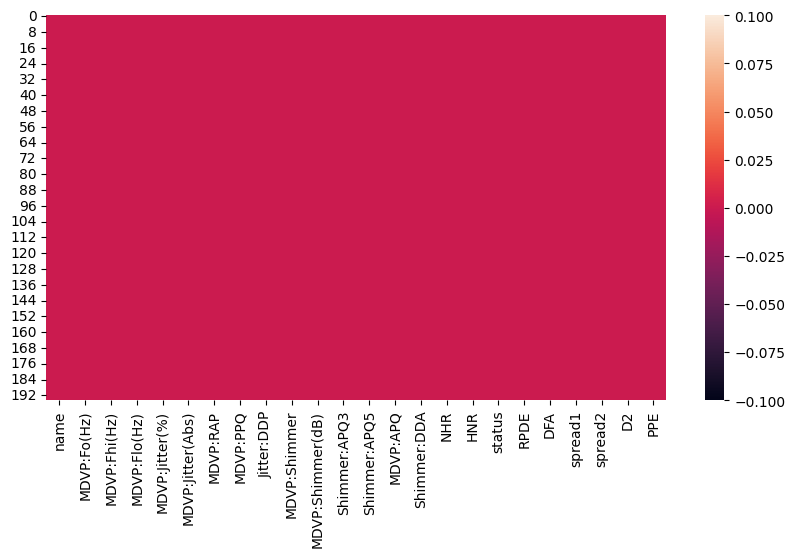

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna())

In [7]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

## data is imbalance

In [8]:
#now remove the imbalanced in the dataset
data_0=df[df['status']==0]
data_1=df[df['status']==1]
(data_0.shape,data_1.shape)

((48, 24), (147, 24))

In [9]:
X=df.drop(['status','name'],axis=1)
y=df['status']

In [10]:
# Now the data is small we will do over sampling  or we will do smote technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

status
1    147
0    147
Name: count, dtype: int64

In [11]:
y_sm

0      1
1      1
2      1
3      1
4      1
      ..
289    0
290    0
291    0
292    0
293    0
Name: status, Length: 294, dtype: int64

In [12]:
np.random.seed(1)
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=1)
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)

(235, 22) (59, 22) (59,) (235,)


In [13]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler() 
X_train_scaled=MMS.fit_transform(X_train)
X_test_scaled=MMS.transform(X_test)
X_train_scaled.shape

(235, 22)

In [14]:
# Now data is ready for the feeding into the model 
Model=LogisticRegression()
Model.fit(X_train,y_train)
(Model.score(X_train,y_train),Model.score(X_test,y_test))

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8170212765957446, 0.7288135593220338)

In [15]:
# Now data is ready for the feeding into the model 
Model=LogisticRegression()
Model.fit(X_train_scaled,y_train)
(Model.score(X_train_scaled,y_train),Model.score(X_test_scaled,y_test))

(0.7914893617021277, 0.7796610169491526)

In [16]:
model1=RandomForestClassifier().fit(X_train,y_train)
(model1.score(X_train,y_train),model1.score(X_test,y_test))

(1.0, 1.0)

In [17]:
# Now data is ready for the feeding into the model 
Model1=RandomForestClassifier()
Model1.fit(X_train_scaled,y_train)
(Model1.score(X_train_scaled,y_train),Model1.score(X_test_scaled,y_test))

(1.0, 0.9830508474576272)

In [18]:
model2=DecisionTreeClassifier().fit(X_train,y_train)
(model2.score(X_train,y_train),model2.score(X_test,y_test))

(1.0, 0.8983050847457628)

In [19]:
# Now data is ready for the feeding into the model 
Model2=DecisionTreeClassifier(random_state=42)
Model2.fit(X_train_scaled,y_train)
(Model2.score(X_train_scaled,y_train),Model2.score(X_test_scaled,y_test))

(1.0, 0.9152542372881356)

In [20]:
y_pred=Model2.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [21]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.93      0.90      0.92        31

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.92        59
weighted avg       0.92      0.92      0.92        59



In [22]:
cm=confusion_matrix(y_pred,y_test)

<Axes: >

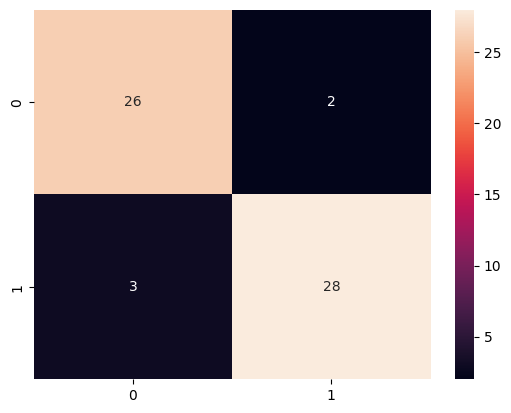

In [23]:
sns.heatmap(cm,annot=True)

In [24]:
import pickle
file = open('Parkinsons_prediction.pkl', 'wb')
pickle.dump(Model2,file)

In [30]:
with open('C:/Users/user/OneDrive/Desktop/Git_hub_projects/Multiple_Diseases_Prediction/Model_pickles/Parkinsons_prediction.pkl', 'wb') as f:
    pickle.dump(Model2, f)

In [25]:
Model=keras.Sequential([
    keras.layers.Flatten(input_shape=(22,)),
    keras.layers.Dense(11,activation='relu'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation='relu'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

Model.compile(
    metrics=['accuracy'], 
    loss='binary_crossentropy', 
    optimizer='adam'
)

Model.fit(X_train,y_train,epochs=100)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4908 - loss: 22.6433
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4890 - loss: 23.3049 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5203 - loss: 19.7692 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4717 - loss: 20.7944 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5512 - loss: 16.9169 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5257 - loss: 15.8402 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4313 - loss: 20.1479 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5387 - loss: 12.1265 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5824 - loss: 12.0896 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5605 - loss: 9.1604  
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.4510 - loss: 14.1819
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy:

In [26]:
Model=keras.Sequential([
    keras.layers.Flatten(input_shape=(22,)),
    keras.layers.Dense(11,activation='relu'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation='relu'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

Model.compile(
    metrics=['accuracy'], 
    loss='binary_crossentropy', 
    optimizer='adam'
)

Model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4913 - loss: 0.6878
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5561 - loss: 0.6721 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5481 - loss: 0.6748 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6050 - loss: 0.6684  
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5935 - loss: 0.6606 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5488 - loss: 0.6597 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5748 - loss: 0.6627 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.6413 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6131 - loss: 0.6581 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6014 - loss: 0.6367 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6571 - loss: 0.6433 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6071 - loss: 0.6546 
E

In [27]:
Model.evaluate(X_train_scaled,y_train)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8323 - loss: 0.4687  


[0.46874430775642395, 0.8553191423416138]

In [28]:
Model.evaluate(X_test_scaled,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7793 - loss: 0.5141 


[0.5207408666610718, 0.7627118825912476]

In [29]:
y_pred=Model.predict(X_test)
y_predicted=[]
for i in y_pred:
    if i<=0.5:
        y_predicted.append(0)
    else:
       y_predicted.append(1)
y_predicted[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


[0, 0, 0, 0, 0]